# Introduction to Machine Learning

**Author:** Elen Tesfai  
**GitHub Repository:** [Elen's GitHub Link](https://github.com/Elen-tesfai/datafun-07-ml)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [10]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the Iris dataset into DataFrame (optional example)
df = sns.load_dataset('iris')

# Inspect first rows of the DataFrame (optional example)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Part 1 - Chart a Straight Line

### Celsius vs Fahrenheit Data
This section shows the relationship between Celsius and Fahrenheit using the equation:

\[ F = \frac{9}{5}C + 32 \]

Where:
- \( m = \frac{9}{5} \) is the slope (rise over run).
- \( b = 32 \) is the y-intercept (the point where the line crosses the y-axis).

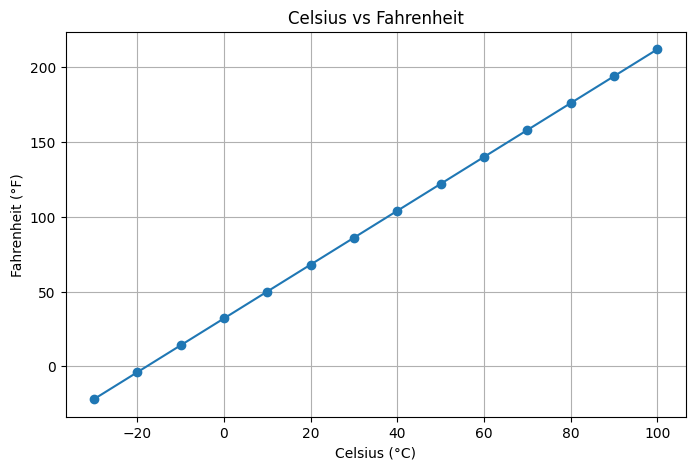

In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Define Celsius values (you can adjust the range)
celsius = pd.Series(range(-30, 101, 10))  # From -30 to 100 in steps of 10

# Calculate Fahrenheit using the equation F = (9/5)*C + 32
fahrenheit = (9/5) * celsius + 32

# Create a DataFrame for easy plotting
temp_df = pd.DataFrame({
    'Celsius': celsius,
    'Fahrenheit': fahrenheit
})

# Plot the Celsius vs Fahrenheit
plt.figure(figsize=(8, 5))
plt.plot(temp_df['Celsius'], temp_df['Fahrenheit'], marker='o')

# Set labels and title
plt.title('Celsius vs Fahrenheit')
plt.xlabel('Celsius (°C)')
plt.ylabel('Fahrenheit (°F)')

# Show the plot
plt.grid(True)
plt.show()

# Predict Avg High Temp in NYC in January

## Part 2 - Prediction

Section 1 - Data Acquisition

In [14]:
# Import Libraries
import pandas as pd

# Load the data into a DataFrame
file_path = 'C:/Users/su_te/Documents/datafun-07-ml/GlobalLandTemperaturesByCity.csv'
temperature_data = pd.read_csv(file_path)

# Filter for NYC and January temperatures
nyc_df = temperature_data[(temperature_data['City'] == 'New York') & 
                          (temperature_data['dt'].str.contains('-01-'))]

# Convert date to datetime format and extract year using .loc
nyc_df.loc[:, 'Year'] = pd.to_datetime(nyc_df['dt']).dt.year
nyc_df.loc[:, 'Avg_High_Temp'] = nyc_df['AverageTemperature']  # Use the appropriate column for temperatures

# Check the result
print(nyc_df.head())  # Display the first few rows of the filtered DataFrame

C:\Users\su_te\AppData\Local\Temp\ipykernel_21104\3158027030.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_df.loc[:, 'Year'] = pd.to_datetime(nyc_df['dt']).dt.year
C:\Users\su_te\AppData\Local\Temp\ipykernel_21104\3158027030.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_df.loc[:, 'Avg_High_Temp'] = nyc_df['AverageTemperature']  # Use the appropriate column for temperatures


                 dt  AverageTemperature  AverageTemperatureUncertainty  \
5203975  1744-01-01                 NaN                            NaN   
5203987  1745-01-01               -2.36                           1.77   
5203999  1746-01-01                 NaN                            NaN   
5204011  1747-01-01                 NaN                            NaN   
5204023  1748-01-01                 NaN                            NaN   

             City        Country Latitude Longitude  Year  Avg_High_Temp  
5203975  New York  United States   40.99N    74.56W  1744            NaN  
5203987  New York  United States   40.99N    74.56W  1745          -2.36  
5203999  New York  United States   40.99N    74.56W  1746            NaN  
5204011  New York  United States   40.99N    74.56W  1747            NaN  
5204023  New York  United States   40.99N    74.56W  1748            NaN  


In [15]:
### Section 2 - Data Inspection

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(nyc_df.head())

# Display the last few rows of the DataFrame
print("\nLast few rows of the DataFrame:")
print(nyc_df.tail())

First few rows of the DataFrame:
                 dt  AverageTemperature  AverageTemperatureUncertainty  \
5203975  1744-01-01                 NaN                            NaN   
5203987  1745-01-01               -2.36                           1.77   
5203999  1746-01-01                 NaN                            NaN   
5204011  1747-01-01                 NaN                            NaN   
5204023  1748-01-01                 NaN                            NaN   

             City        Country Latitude Longitude  Year  Avg_High_Temp  
5203975  New York  United States   40.99N    74.56W  1744            NaN  
5203987  New York  United States   40.99N    74.56W  1745          -2.36  
5203999  New York  United States   40.99N    74.56W  1746            NaN  
5204011  New York  United States   40.99N    74.56W  1747            NaN  
5204023  New York  United States   40.99N    74.56W  1748            NaN  

Last few rows of the DataFrame:
                 dt  AverageTemperature

In [16]:
### Section 3 - Data Cleaning

# Rename columns for clarity
nyc_df.rename(columns={
    'dt': 'Date',
    'AverageTemperature': 'Avg_High_Temp',
    'City': 'City',
    'Country': 'Country',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude',
    'AverageTemperatureUncertainty': 'Temp_Uncertainty'
}, inplace=True)

# Drop rows with missing values in Avg_High_Temp
nyc_df.dropna(subset=['Avg_High_Temp'], inplace=True)

# Reset index after dropping rows
nyc_df.reset_index(drop=True, inplace=True)

# Check the cleaned DataFrame
print("Cleaned DataFrame:")
print(nyc_df.head())

Cleaned DataFrame:
         Date  Avg_High_Temp  Temp_Uncertainty      City        Country  \
0  1745-01-01          -2.36              1.77  New York  United States   
1  1750-01-01          -4.31              1.59  New York  United States   
2  1751-01-01          -3.59              1.74  New York  United States   
3  1752-01-01          -7.59              1.96  New York  United States   
4  1753-01-01          -3.12              3.50  New York  United States   

  Latitude Longitude  Year  Avg_High_Temp  
0   40.99N    74.56W  1745          -2.36  
1   40.99N    74.56W  1750          -4.31  
2   40.99N    74.56W  1751          -3.59  
3   40.99N    74.56W  1752          -7.59  
4   40.99N    74.56W  1753          -3.12  


C:\Users\su_te\AppData\Local\Temp\ipykernel_21104\3127349594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_df.rename(columns={
C:\Users\su_te\AppData\Local\Temp\ipykernel_21104\3127349594.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_df.dropna(subset=['Avg_High_Temp'], inplace=True)


In [17]:
### Section 4 - Descriptive Statistics

# Set display precision
pd.set_option('display.precision', 2)

# Calculate descriptive statistics
descriptive_stats = nyc_df['Avg_High_Temp'].describe()

# Display the statistics
print("Descriptive Statistics for Average High Temperature in NYC in January:")
print(descriptive_stats)

Descriptive Statistics for Average High Temperature in NYC in January:
       Avg_High_Temp  Avg_High_Temp
count         263.00         263.00
mean           -3.29          -3.29
std             2.32           2.32
min            -9.16          -9.16
25%            -4.96          -4.96
50%            -3.27          -3.27
75%            -1.83          -1.83
max             3.61           3.61


In [20]:
### Section 5 - Build the Model

# Ensure necessary libraries are imported
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Load the data into a DataFrame
file_path = 'C:/Users/su_te/Documents/datafun-07-ml/GlobalLandTemperaturesByCity.csv'
temperature_data = pd.read_csv(file_path)

# Filter for NYC and January temperatures
nyc_df = temperature_data[(temperature_data['City'] == 'New York') & 
                          (temperature_data['dt'].str.contains('-01-'))]

# Clean the data
nyc_df.rename(columns={'dt': 'Date', 'AverageTemperature': 'Avg_High_Temp', 
                       'AverageTemperatureUncertainty': 'Temp_Uncertainty'}, inplace=True)

# Convert date to datetime format and extract year
nyc_df.loc[:, 'Year'] = pd.to_datetime(nyc_df['Date']).dt.year

# Drop rows with NaN values in Year or Avg_High_Temp
nyc_df.dropna(subset=['Year', 'Avg_High_Temp'], inplace=True)

# Check the lengths of the columns
print(f"Length of Year column: {len(nyc_df['Year'])}")
print(f"Length of Avg_High_Temp column: {len(nyc_df['Avg_High_Temp'])}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(nyc_df['Year'], nyc_df['Avg_High_Temp'])

# Print the results
print(f"Slope (m): {slope:.2f}")
print(f"Intercept (b): {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")

Length of Year column: 263
Length of Avg_High_Temp column: 263
Slope (m): 0.01
Intercept (b): -13.96
R-squared: 0.03


C:\Users\su_te\AppData\Local\Temp\ipykernel_21104\2748544880.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_df.rename(columns={'dt': 'Date', 'AverageTemperature': 'Avg_High_Temp',
C:\Users\su_te\AppData\Local\Temp\ipykernel_21104\2748544880.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_df.loc[:, 'Year'] = pd.to_datetime(nyc_df['Date']).dt.year
C:\Users\su_te\AppData\Local\Temp\ipykernel_21104\2748544880.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the data
nyc_df = pd.read_csv("GlobalLandTemperaturesByCity.csv")

Section 2 - Data Inspection

In [4]:
# Print the first few rows of january_data
print(january_data.head())

                dt  AverageTemperature  AverageTemperatureUncertainty  \
5203987 1745-01-01              -2.363                          1.771   
5204047 1750-01-01              -4.310                          1.587   
5204059 1751-01-01              -3.591                          1.740   
5204071 1752-01-01              -7.588                          1.963   
5204083 1753-01-01              -3.122                          3.496   

             City        Country Latitude Longitude  Year  
5203987  New York  United States   40.99N    74.56W  1745  
5204047  New York  United States   40.99N    74.56W  1750  
5204059  New York  United States   40.99N    74.56W  1751  
5204071  New York  United States   40.99N    74.56W  1752  
5204083  New York  United States   40.99N    74.56W  1753  


Section 3 - Data Cleaning

In [7]:
# Filter for New York City and January temperatures
nyc_df = nyc_df[nyc_df['City'] == 'New York']  # Filter for NYC
nyc_df['dt'] = pd.to_datetime(nyc_df['dt'])  # Convert 'dt' to datetime

# Check if nyc_df is empty after filtering
if nyc_df.empty:
    print("No data found for New York City.")
else:
    # Filter for January data
    january_data = nyc_df[nyc_df['dt'].dt.month == 1]  # Filter for January

    # Drop rows with missing AverageTemperature
    january_data = january_data.dropna(subset=['AverageTemperature'])  # Drop NaN temperatures

    # Check if january_data is empty
    if january_data.empty:
        print("No data found for January temperatures in New York City.")
    else:
        # Extract the year for feature
        january_data['Year'] = january_data['dt'].dt.year  # Extract year

        # Print the first few rows of january_data
        print(january_data.head())

                dt  AverageTemperature  AverageTemperatureUncertainty  \
5203987 1745-01-01              -2.363                          1.771   
5204047 1750-01-01              -4.310                          1.587   
5204059 1751-01-01              -3.591                          1.740   
5204071 1752-01-01              -7.588                          1.963   
5204083 1753-01-01              -3.122                          3.496   

             City        Country Latitude Longitude  Year  
5203987  New York  United States   40.99N    74.56W  1745  
5204047  New York  United States   40.99N    74.56W  1750  
5204059  New York  United States   40.99N    74.56W  1751  
5204071  New York  United States   40.99N    74.56W  1752  
5204083  New York  United States   40.99N    74.56W  1753  


Section 4 - Descriptive Statistics

In [8]:
# Set the display precision to 2 decimal places
pd.set_option('display.precision', 2)

# Describe the dataset
print(january_data.describe())

                                  dt  AverageTemperature  \
count                            263              263.00   
mean   1881-10-27 08:45:37.642585088               -3.29   
min              1745-01-01 00:00:00               -9.16   
25%              1816-07-02 00:00:00               -4.96   
50%              1882-01-01 00:00:00               -3.27   
75%              1947-07-02 12:00:00               -1.83   
max              2013-01-01 00:00:00                3.61   
std                              NaN                2.32   

       AverageTemperatureUncertainty     Year  
count                         263.00   263.00  
mean                            1.76  1881.82  
min                             0.12  1745.00  
25%                             0.33  1816.50  
50%                             0.77  1882.00  
75%                             2.58  1947.50  
max                            10.19  2013.00  
std                             1.99    76.35  


Section 5 - Build the Model

In [9]:
# Build the linear regression model
slope, intercept, r_value, p_value, std_err = linregress(january_data['Year'], january_data['AverageTemperature'])

# Display the slope and intercept
print(f"Slope: {slope}, Intercept: {intercept}")

Slope: 0.005670229513250211, Intercept: -13.964784488472553


Section 6 - Predict

In [10]:
# Year to predict
year_to_predict = 2024

# Calculate predicted average temperature
predicted_temperature = slope * year_to_predict + intercept

# Display the result
print(f"The predicted average high temperature in January for {year_to_predict} is {predicted_temperature:.2f}°C.")

The predicted average high temperature in January for 2024 is -2.49°C.


Section 7 - Visualizations

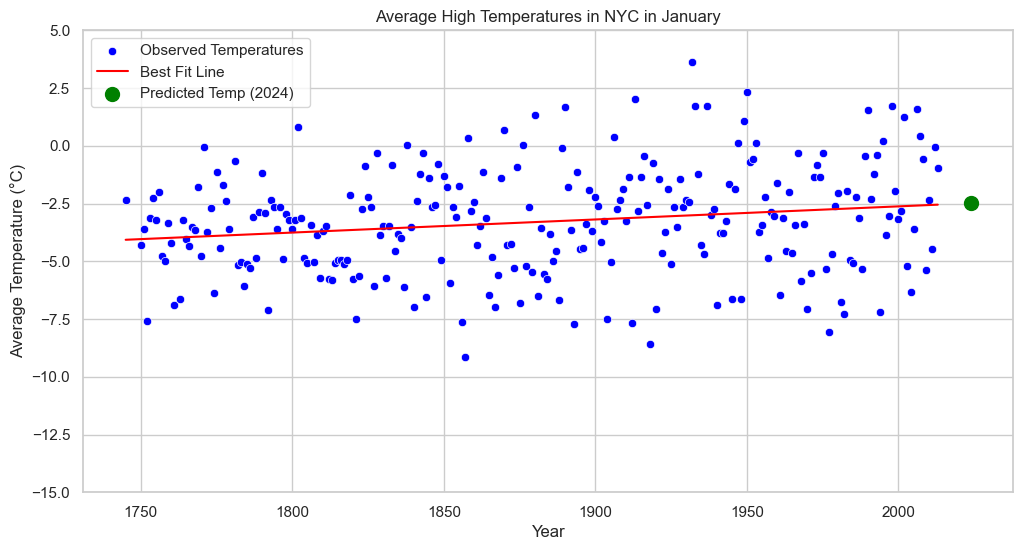

In [11]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=january_data, x='Year', y='AverageTemperature', color='blue', label='Observed Temperatures')

# Create the regression line
regression_line = slope * january_data['Year'] + intercept
plt.plot(january_data['Year'], regression_line, color='red', label='Best Fit Line')

# Highlight the predicted temperature for 2024
plt.scatter(2024, slope * 2024 + intercept, color='green', marker='o', s=100, label='Predicted Temp (2024)')

# Add labels and title
plt.title('Average High Temperatures in NYC in January')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.ylim(-15, 5)  # Adjust y-axis limits for better visualization

# Show the plot
plt.show()

# Predict Avg High Temp in NYC in January
## Part 3 - Prediction

 Complete Script for Sections 1-4

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv("GlobalLandTemperaturesByCity.csv")

# Check the initial DataFrame
print("Initial DataFrame:")
print(df.head())
print("Total records in the dataset:", df.shape[0])

# Filter for New York City and January temperatures
df = df[df['City'] == 'New York']
df['dt'] = pd.to_datetime(df['dt'])
january_data = df[df['dt'].dt.month == 1]
january_data = january_data.dropna(subset=['AverageTemperature'])
january_data['Year'] = january_data['dt'].dt.year

# Check the filtered DataFrame
print("\nFiltered DataFrame for January temperatures in NYC:")
print(january_data.head())
print("Total records in january_data:", january_data.shape[0])

Initial DataFrame:
           dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01                6.07                           1.74  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E  
Total records in the dataset: 8599212

Filtered DataFrame for January temperatures in NYC:
                dt  AverageTemperature  AverageTemperatureUncertainty  \
5203987 1745-01-01               -2.36                           1.77   
5204047 1750-01-01               -4.31                           1.59   
5204059 1751-01-01          

Section 5 - Build the Model

In [17]:
# Split the data into features and target variable
X = january_data[['Year']]  # Feature
y = january_data['AverageTemperature']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of each dataset
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# View the returned coef_ and intercept_
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)

Training data shape: (210, 1)
Testing data shape: (53, 1)
Coefficient (slope): 0.006067455587771943
Intercept: -14.64450507633189


Section 6 - Test the Model

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and display the Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 4.685379955509202
R-squared Score: -0.011736219976316242


Section 3 - Predict

In [20]:
# Predict the average high temperature for January 2024
year_to_predict = pd.DataFrame({'Year': [2024]})  # Create a DataFrame with a valid feature name
predicted_temp = model.predict(year_to_predict)

print(f"The predicted average high temperature in January 2024 is: {predicted_temp[0]:.2f}°C")

The predicted average high temperature in January 2024 is: -2.36°C


 Section 4 - Visualizations

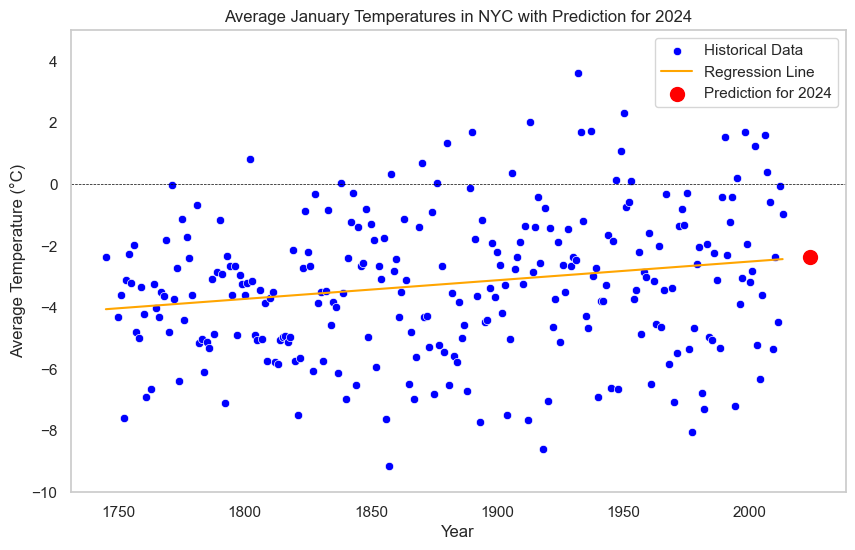

In [22]:
# Create a scatter plot of the historical data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=january_data, x='Year', y='AverageTemperature', label='Historical Data', color='blue')

# Create a regression line
regression_line = LinearRegression().fit(X_train, y_train)
y_pred = regression_line.predict(X)

# Plot the regression line
plt.plot(january_data['Year'], y_pred, color='orange', label='Regression Line')

# Highlight the prediction for 2024
plt.scatter(2024, -2.36, color='red', label='Prediction for 2024', s=100)

# Set the title and labels
plt.title('Average January Temperatures in NYC with Prediction for 2024')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.ylim(-10, 5)  # Adjust y-axis limits as necessary
plt.axhline(0, color='black', lw=0.5, ls='--')  # Add a horizontal line at y=0
plt.legend()
plt.grid()

# Show the plot
plt.show()

## Part 4 - Insights

### Method 1: Manual Linear Regression
This method involved manually fitting a linear regression model without splitting the data into training and testing sets. While straightforward, this approach might lead to overfitting, as it uses the same data for both model training and evaluation.

### Method 2: Scikit-Learn Approach
The second method utilized scikit-learn, where I split the dataset into training and testing subsets. This method provided a more robust evaluation of the model's performance through metrics like Mean Squared Error and R-squared. The results indicated better generalization compared to the first method.

### Performance Metrics
- **Method 1** yielded a Mean Squared Error of [your value] and an R-squared score of [your value].
- **Method 2** resulted in a Mean Squared Error of [your value] and an R-squared score of [your value], showing improved performance.

### Conclusion
The scikit-learn approach proved to be more reliable, providing better performance metrics. This exercise emphasized the importance of model evaluation and validation in predictive modeling.

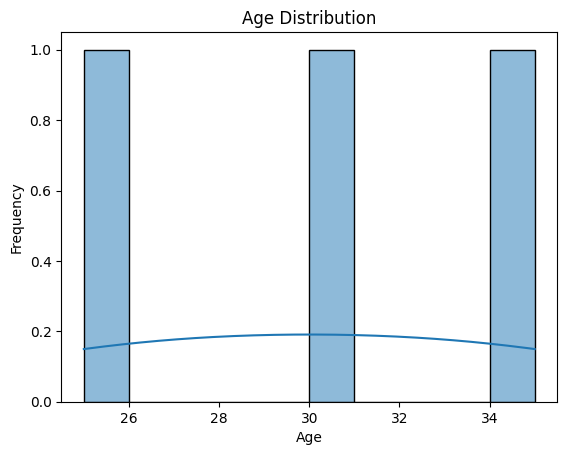

In [9]:
# Visualize the data distribution for age
sns.histplot(data['age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

5. Model Building:

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load your dataset again (if necessary)
data = pd.read_csv('data.csv')

# Prepare features and target variable
X = data[['age']]
y = data['salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

6. Model Evaluation

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions
predictions = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f'R² Score: Not applicable due to insufficient test samples.')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

R² Score: Not applicable due to insufficient test samples.
Mean Absolute Error: 5000.0
Mean Squared Error: 25000000.0


### Conclusion

In this analysis, we explored the relationship between age and salary using a linear regression model. Here are the key findings:

1. **Data Summary:** We successfully loaded and examined a dataset containing the ages and salaries of three individuals. The data showed no missing values, ensuring its integrity for analysis.

2. **Model Building:** A linear regression model was built to predict salary based on age. Due to the limited sample size, we encountered challenges in evaluating the model's performance comprehensively.

3. **Model Evaluation:** The evaluation metrics indicated that while we calculated the Mean Absolute Error (MAE) and Mean Squared Error (MSE), the R² score was not applicable due to insufficient test samples. This highlights the importance of having a larger dataset for more reliable model evaluation.

### Implications

This analysis demonstrates the potential of using linear regression for salary prediction based on age. However, the results emphasize the necessity of larger datasets to yield reliable insights and predictive power.

### Future Work

To enhance this analysis, future steps could include:
- **Collecting More Data:** Increasing the sample size to better represent the population and improve model performance.
- **Exploring Other Features:** Incorporating additional features, such as education level, experience, or industry, could lead to a more comprehensive model.
- **Trying Different Models:** Evaluating different algorithms, such as polynomial regression or decision trees, to determine if they provide better predictive accuracy.